# Week 5 HW : Unsupervised Learning

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(513)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "UNSUPERVISED_LEARNING"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

import warnings
warnings.filterwarnings(action = 'ignore', message = "internal gelsd")

## Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving Figure classification_vs_clustering_plot


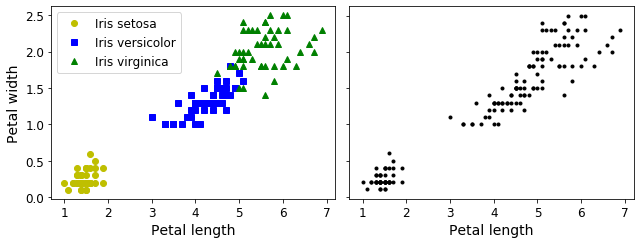

In [4]:
plt.figure(figsize = (9, 3.5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[y == 0, 3], "yo", label = "Iris setosa")
plt.plot(X[y == 1, 2], X[y == 1, 3], "bs", label = "Iris versicolor")
plt.plot(X[y == 2, 2], X[y == 2, 3], "g^", label = "Iris virginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c = 'k', marker = '.')
plt.xlabel("Petal length", fontsize = 14)
plt.tick_params(labelleft = False)
save_fig("classification_vs_clustering_plot")
plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components = 3, random_state = 513).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

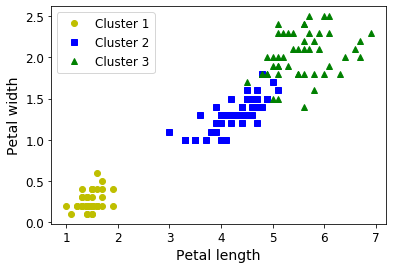

In [7]:
plt.plot(X[y == 0, 2], X[y == 0, 3], "yo", label = "Cluster 1")
plt.plot(X[y == 1, 2], X[y == 1, 3], "bs", label = "Cluster 2")
plt.plot(X[y == 2, 2], X[y == 2, 3], "g^", label = "Cluster 3")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize = 12)
plt.show()

In [8]:
np.sum(y_pred == y)

145

In [9]:
np.sum(y_pred == y) / len(y_pred)

0.9666666666666667

## K-Means

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers, 
                  cluster_std = blob_std, random_state = 513)

In [13]:
def plot_clusters(X, y = None):
    plt.scatter(X[:, 0], X[:, 1], c = y, s =1)
    plt.xlabel("$x_1$", fontsize = 14)
    plt.ylabel("$x_2$", fontsize = 14, rotation = 0)

Saving Figure blobs_plot


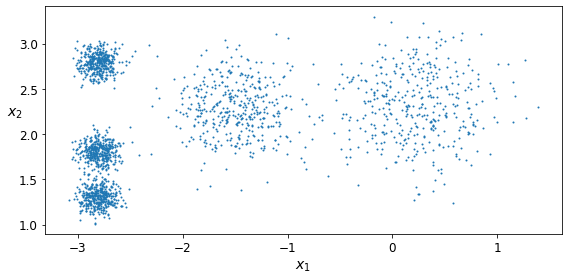

In [14]:
plt.figure(figsize = (8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Fit and Predict

In [15]:
from sklearn.cluster import KMeans

In [16]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 513)
y_pred = kmeans.fit_predict(X)

In [17]:
y_pred

array([4, 2, 2, ..., 0, 1, 4])

In [18]:
y_pred is kmeans.labels_

True

In [19]:
kmeans.cluster_centers_

array([[-2.79594705,  2.78794856],
       [ 0.23133204,  2.31506754],
       [-2.79936799,  1.80679359],
       [-1.47433719,  2.27796806],
       [-2.80199373,  1.30027057]])

In [20]:
kmeans.labels_

array([4, 2, 2, ..., 0, 1, 4])

In [21]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0])

### Decision Boundaries

In [22]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize = 2)
    
def plot_centroids(centroids, weights = None, circle_color = 'w', cross_color = 'k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker = 'o', s = 3, linewidths = 8,
               color = circle_color, zorder = 10, alpha = 0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker = 'x', s = 50, linewidths = 50,
               color = circle_color, zorder = 11, alpha = 1)
    
def plot_decision_boundaries(clusterer, X, resolution = 1000, show_centroids =True,
                            show_xlabels = True, show_ylabels = True):
    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy =np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
                 cmap = "Pastel2")
    plt.contour(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
                linewidths = 1 ,colors = 'k')
    
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize = 14)
    else:
        plt.tick_params(labelbottom = False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize= 14, rotation = 0)
    else:
         plt.tick_params(labelleft = False)

Saving Figure Voronoi_Plot


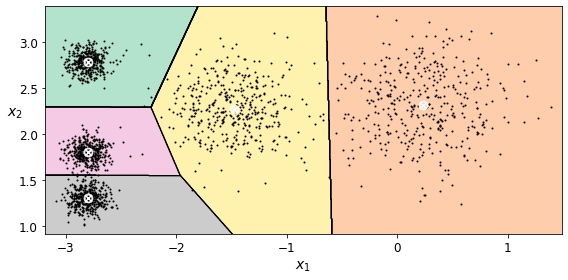

In [23]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans ,X)
save_fig("Voronoi_Plot")
plt.show()

### Hard Clustering vs Soft Clustering

In [24]:
kmeans.transform(X_new)

array([[2.90485504, 0.39087347, 2.80602742, 1.5003121 , 2.88804262],
       [5.84926193, 2.78653725, 5.80258544, 4.48296325, 5.84403564],
       [0.29428459, 3.30312567, 1.20995651, 1.68789133, 1.71122372],
       [0.35291923, 3.23661965, 0.72165666, 1.54173448, 1.21595937]])

In [25]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis =2)

array([[2.90485504, 0.39087347, 2.80602742, 1.5003121 , 2.88804262],
       [5.84926193, 2.78653725, 5.80258544, 4.48296325, 5.84403564],
       [0.29428459, 3.30312567, 1.20995651, 1.68789133, 1.71122372],
       [0.35291923, 3.23661965, 0.72165666, 1.54173448, 1.21595937]])

### K-Means Algorithm

In [26]:
kmeans_iter1 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                     algorithm = "full", max_iter = 1, random_state = 513)
kmeans_iter2 = KMeans(n_clusters = 5, init = "random", n_init = 2,
                     algorithm = "full", max_iter = 1, random_state = 513)
kmeans_iter3 = KMeans(n_clusters = 5, init = "random", n_init = 3,
                     algorithm = "full", max_iter = 1, random_state = 513)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=1, n_clusters=5,
       n_init=3, n_jobs=None, precompute_distances='auto', random_state=513,
       tol=0.0001, verbose=0)

Saving Figure kmeans_algorithm_plot


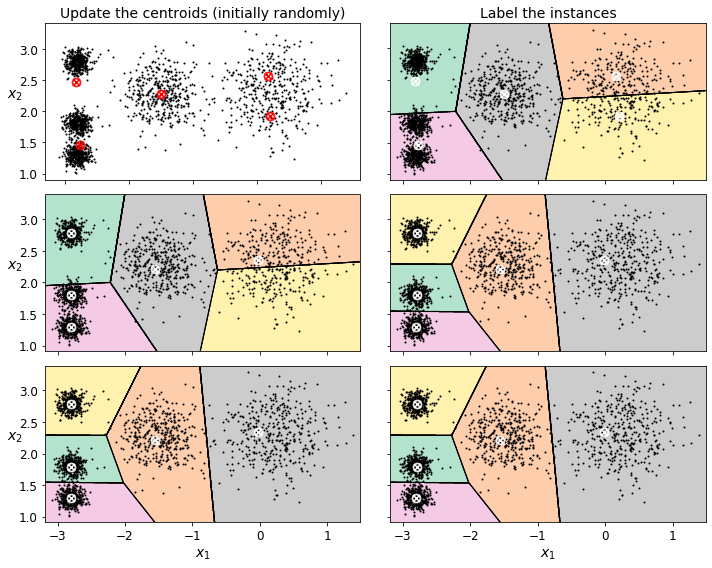

In [27]:
plt.figure(figsize = (10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color = 'r', cross_color = 'w')
plt.ylabel("$x_2$", fontsize = 14, rotation = 0)
plt.tick_params(labelbottom = False)
plt.title("Update the centroids (initially randomly)", fontsize = 14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels = False, show_ylabels = False)
plt.title("Label the instances", fontsize = 14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids = False, show_xlabels = False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels = False, show_ylabels = False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids = False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels = False)

save_fig("kmeans_algorithm_plot")
plt.show()

### K-Means Variability

In [28]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1 = None, title2 = None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize = (10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize = 14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels = False)
    if title2:
        plt.title(title2, fontsize = 14)

Saving Figure kmeans_variability_plot


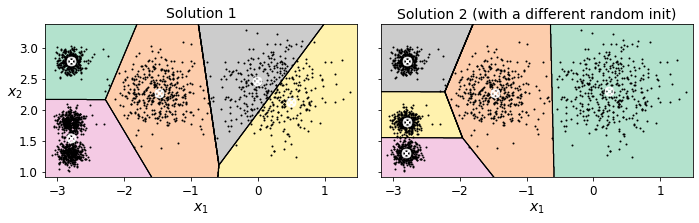

In [29]:
kmeans_rnd_init1 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                        algorithm = 'full', random_state = 516)
kmeans_rnd_init2 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                        algorithm = 'full', random_state = 126)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                         "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

### Inertia

In [30]:
kmeans.inertia_

206.38327971285474

In [31]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

206.38327971285509

In [32]:
kmeans.score(X)

-206.38327971285509

### Multiple Initializations

In [33]:
kmeans_rnd_init1.inertia_

220.76880613594165

In [34]:
kmeans_rnd_init2.inertia_

206.3832797128547

In [35]:
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init = 'random', n_init = 10,
                            algorithm = 'full', random_state = 516)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=516,
       tol=0.0001, verbose=0)

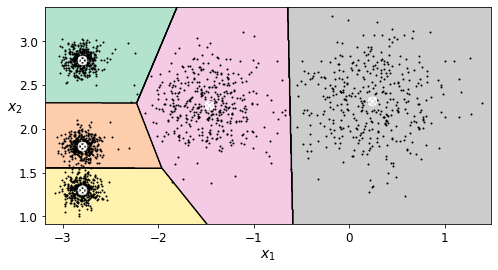

In [36]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K-Means++

In [37]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 516)
kmeans.fit(X)
kmeans.inertia_

206.38327971285474

### Accelerated K-Means

In [39]:
%timeit -n 50 KMeans(algorithm = 'elkan').fit(X)

157 ms ± 17.2 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [40]:
%timeit -n 50 KMeans(algorithm = 'full').fit(X)

179 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means

In [41]:
from sklearn.cluster import MiniBatchKMeans as MBKMeans

In [42]:
mb_kmeans = MBKMeans(n_clusters = 5, random_state = 516)
mb_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=516,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [43]:
mb_kmeans.inertia_

206.87516095221716

In [44]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.int64)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"],
                                                   random_state = 516)

In [46]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype = 'float32', mode = 'write', shape = X_train.shape)
X_mm[:] = X_train

In [47]:
mb_kmenas = MBKMeans(n_clusters = 10, batch_size = 10, random_state = 516)
mb_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=516,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [48]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace = False)]

In [49]:
np.random.seed(516)

In [50]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    mb_kmeans = MBKMeans(n_clusters = k, init_size = init_size)
    X_init = load_next_batch(init_size)
    mb_kmeans.partial_fit(X_init)
    
    mb_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        mb_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            mb_kmeans.sum_inertia_ += mb_kmeans.sum_inertia_
            
    if (best_kmeans is None or
       mb_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = mb_kmeans

In [51]:
best_kmeans.score(X)

-206.47617431503977

In [52]:
%timeit KMeans(n_clusters = 5).fit(X)

83 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%timeit MBKMeans(n_clusters = 5).fit(X)

43.2 ms ± 5.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
from timeit import timeit

In [55]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters = k, random_state = 516)
    mb_kmeans = MBKMeans(n_clusters = k, random_state = 516)
    print("\r{}/{}".format(k, 100), end = "")
    times[k-1 ,0] = timeit("kmeans_.fit(X)", number = 10, globals = globals())
    times[k-1, 1] = timeit("mb_kmeans.fit(X)", number = 10, globals = globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = mb_kmeans.inertia_    

100/100

[1, 100, 0, 6]

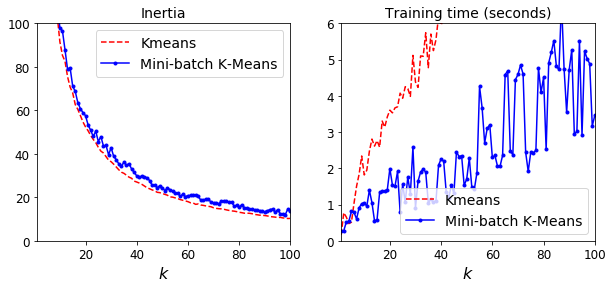

In [56]:
plt.figure(figsize = (10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label = "Kmeans")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label = "Mini-batch K-Means")
plt.xlabel("$k$", fontsize = 16)
plt.title("Inertia", fontsize = 14)
plt.legend(fontsize = 14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label = "Kmeans")
plt.plot(range(1, 101), times[:, 1], "b.-", label = "Mini-batch K-Means")
plt.xlabel("$k$", fontsize = 16)
plt.title("Training time (seconds)", fontsize = 14)
plt.legend(fontsize = 14)
plt.axis([1, 100, 0, 6])

### Finding the optimal number of clusters

Saving Figure bad_n_clusters_plot


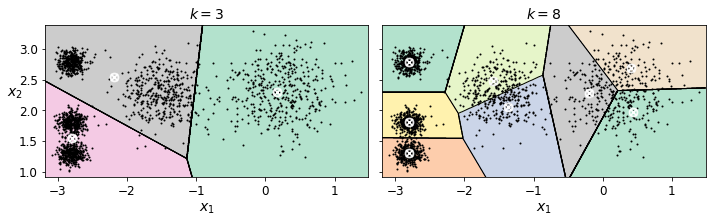

In [57]:
kmeans_k3 = KMeans(n_clusters = 3, random_state = 516)
kmeans_k8 = KMeans(n_clusters = 8, random_state = 516)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [58]:
print(kmeans_k3.inertia_, kmeans_k8.inertia_)

644.3778827860958 118.27226180287002


In [59]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 516).fit(X)
               for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving Figure inertia_vs_k_plot


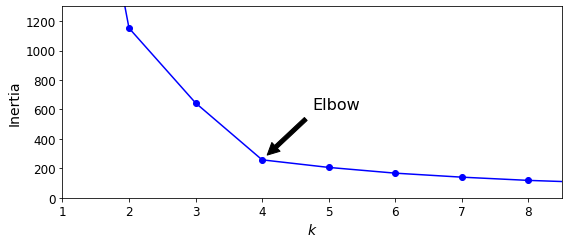

In [60]:
plt.figure(figsize = (8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.annotate("Elbow",
            xy = (4, inertias[3]),
            xytext = (0.55, 0.55),
            textcoords = 'figure fraction',
            fontsize = 16,
            arrowprops = dict(facecolor = 'black', shrink = 0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

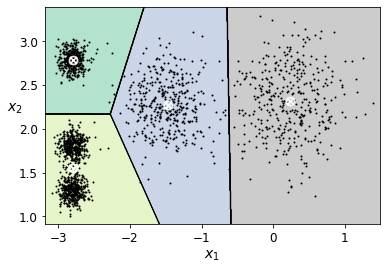

In [61]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [62]:
from sklearn.metrics import silhouette_score as sil_sc

In [63]:
sil_sc(X, kmeans.labels_)

0.6601630497065409

In [64]:
sil_scs = [sil_sc(X, model.labels_) for model in kmeans_per_k[1:]]

Saving Figure silhouette_score_vs_k_plot


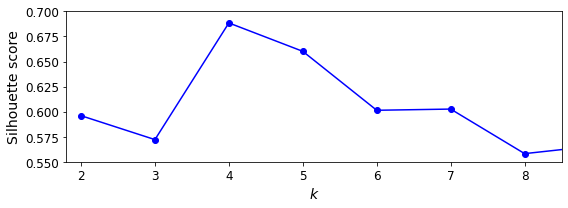

In [65]:
plt.figure(figsize = (8, 3))
plt.plot(range(2,10), sil_scs, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette score", fontsize = 14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

In [66]:
from sklearn.metrics import silhouette_samples as sil_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

Saving Figure silhouette_analysis_plot


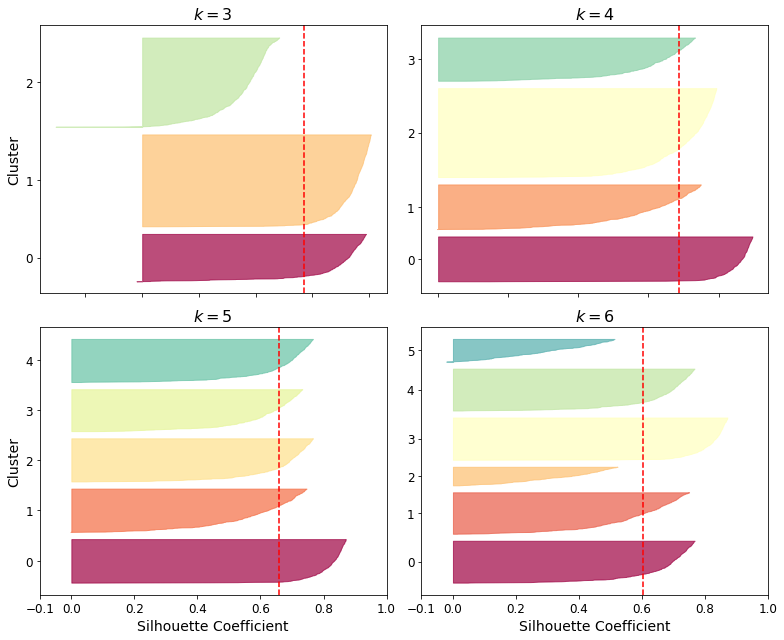

In [67]:
plt.figure(figsize = (11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k-1].labels_
    sil_coef = sil_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = sil_coef[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos+len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom = False)
        
    plt.axvline(x = sil_scs[k - 2], color = 'red', linestyle = "--")
    plt.title("$k={}$".format(k), fontsize = 16)
                    
save_fig("silhouette_analysis_plot")
plt.show()

### Limits of K-Means

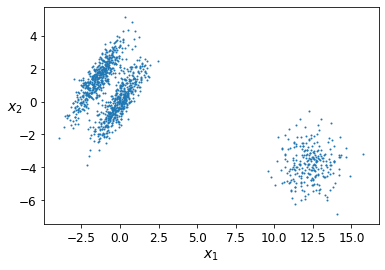

In [68]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 516)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 516)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plot_clusters(X)

In [69]:
kmeans_good = KMeans(n_clusters = 3, init = np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init = 1, random_state = 516)
kmeans_bad = KMeans(n_clusters = 3, random_state = 516)

In [70]:
kmeans_good.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-1.5,  2.5],
       [ 0.5,  0. ],
       [ 4. ,  0. ]]),
       max_iter=300, n_clusters=3, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=516, tol=0.0001, verbose=0)

In [71]:
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=516, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Inertia = 2268.6')

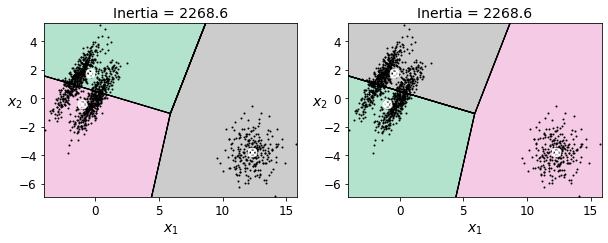

In [72]:
plt.figure(figsize = (10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize = 14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize = 14)

### Using clustering for image segmentation

In [73]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok = True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1e0b92387f0>)

In [74]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [75]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8, random_state = 516).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [76]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 516).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving Figure image_segmentation_diagram


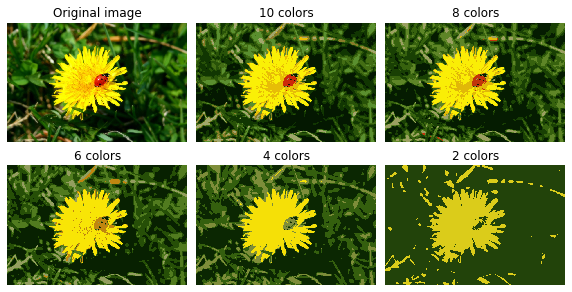

In [77]:
plt.figure(figsize = (10, 5))
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis("off")
    
save_fig("image_segmentation_diagram", tight_layout = False)
plt.show()

### Using Clustering for Preprocessing

In [78]:
from sklearn.datasets import load_digits

In [79]:
X_digits, y_digits = load_digits(return_X_y = True)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 516)

In [81]:
from sklearn.linear_model import LogisticRegression as LReg

In [82]:
log_reg = LReg(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 516)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=516, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
log_reg.score(X_test, y_test)

0.9622222222222222

In [84]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50, random_state = 516)),
    ("log_reg", LReg(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, 
                     random_state = 516)),
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=516,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=516,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [85]:
pipeline.score(X_test, y_test)

0.9888888888888889

In [86]:
1 - (1 - pipeline.score(X_test, y_test)) / (1 - log_reg.score(X_test, y_test))

0.7058823529411777

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

C:\Users\LOGAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ............................ kmeans__n_clusters=82, total=   9.4s
[CV] kmeans__n_clusters=83 ...........................................
[CV] ............................ kmeans__n_clusters=83, total=   8.2s
[CV] kmeans__n_clusters=83 ...........................................
[CV] ............................ kmeans__n_clusters=83, total=   8.2s
[CV] kmeans__n_clusters=83 ...........................................
[CV] ............................ kmeans__n_clusters=83, total=   8.0s
[CV] kmeans__n_clusters=84 ...........................................
[CV] ............................ kmeans__n_clusters=84, total=   8.2s
[CV] kmeans__n_clusters=84 ...........................................
[CV] ............................ kmeans__n_clusters=84, total=   7.9s
[CV] kmeans__n_clusters=84 ...........................................
[CV] ............................ kmeans__n_clusters=84, total=   7.3s
[CV] kmeans__n_clusters=85 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 32.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=516, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
     

In [88]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [89]:
grid_clf.score(X_test, y_test)

0.9888888888888889

### Clustering for Semi-supervised Learning

In [90]:
n_labeled = 50

In [91]:
log_reg = LReg(multi_class = "ovr", solver = "lbfgs", random_state = 516)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

C:\Users\LOGAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8311111111111111

In [92]:
k = 50

In [93]:
kmeans = KMeans(n_clusters = k, random_state = 516)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

Saving Figure representative_images_diagram


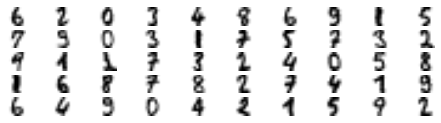

In [94]:
plt.figure(figsize = (8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap = 'binary', interpolation = 'bilinear')
    plt.axis("off")
    
save_fig("representative_images_diagram", tight_layout = False)
plt.show()

In [95]:
y_representative_digits = np.array([
    6, 2, 0, 3, 4, 8, 6, 9, 1, 5,
    7, 3, 0, 3, 1, 7, 5, 7, 3, 2, 
    9, 1, 1, 7, 3, 2, 4, 0, 5, 8, 
    1, 6, 8, 7, 8, 2, 7, 4, 1, 3, 
    6 ,4 ,9 ,0 ,4, 2, 1, 5, 9, 2])

In [96]:
log_reg = LReg(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 516)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.88

In [97]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [98]:
log_reg = LReg(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 516)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=516, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
log_reg.score(X_test, y_test)

0.8977777777777778

In [100]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [101]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [102]:
log_reg = LReg(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 516)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=516, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
log_reg.score(X_test, y_test)

0.9488888888888889

## Gaussian Mixtures

In [104]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 516)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 516)
X2 = X2 + (6, -8)
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [105]:
from sklearn.mixture import GaussianMixture as GM

gm = GM(n_components = 3, n_init = 10, random_state = 516)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=516, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [106]:
gm.weights_

array([0.39916999, 0.2       , 0.40083001])

In [107]:
gm.means_

array([[-0.03472349, -0.02683415],
       [12.30407733, -3.78111674],
       [-1.40240599,  1.45974358]])

In [108]:
gm.covariances_

array([[[0.6366827 , 0.78688227],
        [0.78688227, 1.33723304]],

       [[1.0040959 , 0.03972911],
        [0.03972911, 1.11223558]],

       [[0.72786321, 0.85854474],
        [0.85854474, 1.33824102]]])

In [109]:
gm.converged_

True

In [110]:
gm.n_iter_

18

In [111]:
gm.predict(X)

array([2, 0, 0, ..., 1, 1, 1], dtype=int64)

In [112]:
gm.predict_proba(X)

array([[1.41495460e-009, 6.98646223e-050, 9.99999999e-001],
       [9.99999996e-001, 1.59273775e-035, 3.92246993e-009],
       [9.99999949e-001, 1.66321176e-036, 5.12436965e-008],
       ...,
       [3.29249726e-260, 1.00000000e+000, 0.00000000e+000],
       [2.64385439e-296, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000]])

In [113]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.12864191, -0.40083313],
       [-0.5402571 , -0.5194343 ],
       [ 0.93034617,  1.58326162],
       [12.09267746, -3.25998731],
       [-2.36569609, -0.26065062],
       [-1.34094626,  0.81804449]])

In [114]:
y_new

array([0, 0, 0, 1, 2, 2])

In [115]:
gm.score_samples(X)

array([-2.52885308, -2.35069346, -2.14188505, ..., -5.36181926,
       -3.89892689, -4.85072135])

In [116]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.8021201742581593

In [117]:
from matplotlib.colors import LogNorm

def plot_gm(clusterer, X, resolution = 1000, show_ylabels = True):
    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,
                norm = LogNorm(vmin = 1.0, vmax = 30.0),
                levels = np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
               norm = LogNorm(vmin = 1.0, vmax = 30.0),
               levels = np.logspace(0, 2, 12))
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, 
               linewidths = 2, colors = 'r', linestyles = 'dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize =2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    plt.xlabel("$x_1$", fontsize = 14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize = 14, rotation = 0)
    else:
        plt.tick_params(labelleft = False)

Saving Figure gaussian_mixture_plot


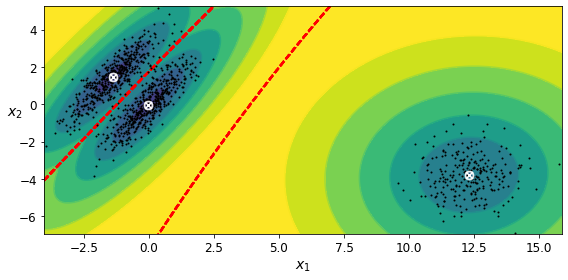

In [118]:
plt.figure(figsize = (8, 4))

plot_gm(gm, X)

save_fig("gaussian_mixture_plot")
plt.show()

In [119]:
gm_full = GM(n_components = 3, n_init = 10, covariance_type = "full", random_state = 516)
gm_tied = GM(n_components = 3, n_init = 10, covariance_type = "tied", random_state = 516)
gm_spherical = GM(n_components = 3, n_init = 10, covariance_type = "spherical", 
                  random_state = 516)
gm_diag = GM(n_components = 3, n_init = 10, covariance_type = "diag", random_state = 516)


gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=516, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [120]:
def compare_gm(gm1, gm2, X):
    plt.figure(figsize = (9, 4))
    
    plt.subplot(121)
    plot_gm(gm1, X)
    plt.title('covariance_type ="{}"'.format(gm1.covariance_type), fontsize = 14)
    
    plt.subplot(122)
    plot_gm(gm2, X, show_ylabels = False)
    plt.title('covariance_type ="{}"'.format(gm2.covariance_type), fontsize = 14)

Saving Figure covariance_type_plot


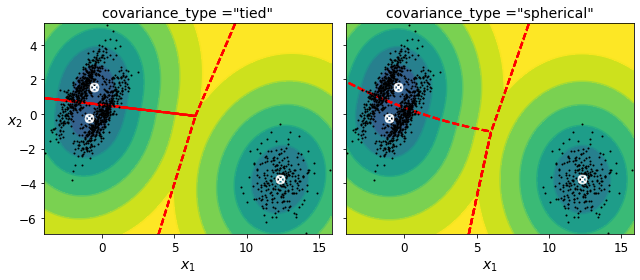

In [121]:
compare_gm(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

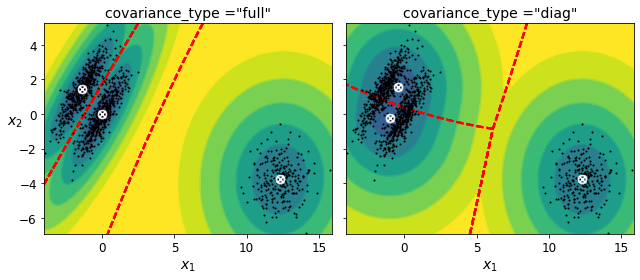

In [122]:
compare_gm(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

### Anomaly Detection using Gaussian Mixtures

In [123]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Saving Figure mixture_anomaly_detection_plot


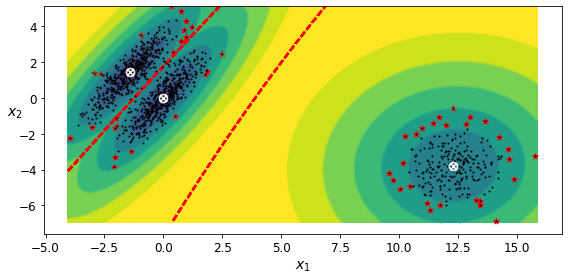

In [124]:
plt.figure(figsize = (8, 4))

plot_gm(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color = 'r', marker = "*")
plt.ylim(top = 5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

### Model Selection

In [125]:
gm.bic(X)

8411.069968225891

In [126]:
gm.aic(X)

8323.844688110854

In [127]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance 
max_log_likelihood = gm.score(X) * len(X)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [128]:
bic, aic

(8411.069968225891, 8323.844688110854)

In [129]:
n_params

17

In [130]:
gms_per_k = [GM(n_components = k, n_init = 10, random_state = 516).fit(X)
            for k in range(1, 11)]

In [131]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Saving Figure aic_bic_vs_k_plot


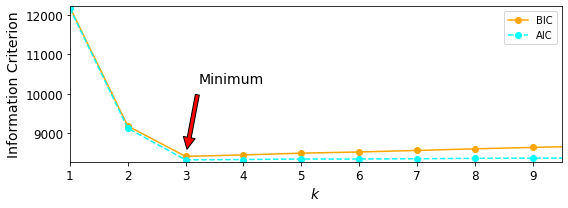

In [132]:
plt.figure(figsize = (8, 3))
plt.plot(range(1, 11), bics, "o-", color = 'orange', label = "BIC")
plt.plot(range(1, 11), aics, "o--", color = 'cyan', label = "AIC")
plt.xlabel('$k$', fontsize = 14)
plt.ylabel("Information Criterion", fontsize = 14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
            xy = (3, bics[2]),
            xytext = (0.35, 0.6),
            textcoords = 'figure fraction',
            fontsize = 14,
            arrowprops = dict(facecolor = 'r', shrink = 0.1))
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

In [133]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GM(n_components = k, n_init = 10, 
                covariance_type = covariance_type,
                random_state = 516).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [134]:
best_k, best_covariance_type

(3, 'full')